In [1]:
# %%

import csv
import pickle
from os.path import exists

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from ipysigma import Sigma
from scipy.stats import beta
from tqdm.notebook import trange

from network import get_network_stats
from parameter import AgentParameter
from social_model import SocialModel
from utils import *

# from d3blocks import D3Blocks

# get_network_stats(G)


G = convert_csv_to_graph(
    f'data/networks/ego_net_test.csv', sep=',', whole=True)

result_path = f'data/results/result_test.csv'

# Initialise the agents based on the agent_parameters
social_model = SocialModel(G, from_scratch=True)

for _ in trange(config.simulation_periods, position=1, leave=False):
    model_df = social_model.data_collector.get_model_vars_dataframe()
    social_model.step()
    # agent_dfs = test_model.data_collector.get_agent_vars_dataframe()

model_df.to_csv(result_path, index=False)


# print(agent_dfs)


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


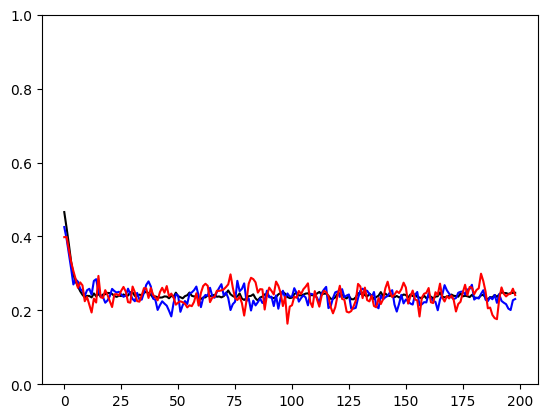

In [2]:
df = pd.read_csv(result_path)

fig, ax = plt.subplots()

x = range(199)

y1 = df['average_opinion_all']
y2 = df['average_opinion_left']
y3 = df['average_opinion_right']

plt.ylim([0, 1])

ax.plot(x,y1,color='black')
ax.plot(x,y2, color='blue')
ax.plot(x,y3, color='red')